![logo](../.././docs/images/Logo_Destination_Earth_Colours.png)

## Polytope Extremes-DT Feature Extraction pcolormesh example notebook

This notebook shows how to use earthkit-data and earthkit-plots to pull destination-earth data from LUMI and plot it using earthkit-plots and pcolormesh.


Before running the notebook you need to set up your credentials. See the main readme of this repository for different ways to do this or use the following cells to authenticate.

You will need to generate your credentials using the desp-authentication.py script.

This can be run as follows:

In [ ]:
%%capture cap
%run ../desp-authentication.py

This will generate a token that can then be used by earthkit and polytope.

In [ ]:
output_1 = cap.stdout.split('}\n')
access_token = output_1[-1][0:-1]

# Requirements
To run this notebook install the following:
* pip install earthkit-data
* pip install earthkit-plots
* pip install cf-units         (Optional for unit conversion in maps)

In [1]:
import earthkit.data
import earthkit.plots
import earthkit.geo.cartography
from polytope.api import Client

In [2]:
# Set True if you want to make a live request for the data, or false if you want to use the cached grib file
LIVE_REQUEST = True

In [23]:
countries = ["Spain", "Germany", "Sweden"] # List of countries
shapes = earthkit.geo.cartography.country_polygons(countries, resolution=50e7)

In [24]:
request = {
    "dataset": "extremes-dt",
    "class": "d1",
    "stream": "oper",
    "type": "fc",
    "date": "-14",
    "time": "0000",
    "levtype": "sfc",
    "expver": "0001",
    "param": "165/167",
    "step": "1",
    "feature": {
        "type": "polygon",
        "shape": shapes,
    },
}

In [ ]:
data_file = "data/extremes-dt-earthkit-example-fe-country.covjson"
if LIVE_REQUEST:
    data = earthkit.data.from_source("polytope", "destination-earth", request, address="polytope.lumi.apps.dte.destination-earth.eu", stream=False)
    data.to_target("file", data_file)
else:
    data = earthkit.data.from_source("file", data_file) 

In [26]:
# Convert data to xarray
ds = data.to_xarray()
ds

<xarray.Dataset> Size: 3MB
Dimensions:    (datetimes: 1, number: 1, steps: 1, points: 59477)
Coordinates:
  * datetimes  (datetimes) <U20 80B '2025-09-12T00:00:00Z'
  * number     (number) int64 8B 0
  * steps      (steps) int64 8B 1
  * points     (points) int64 476kB 0 1 2 3 4 ... 59472 59473 59474 59475 59476
    latitude   (points) float64 476kB 35.98 35.98 35.98 ... 69.06 69.06 69.09
    longitude  (points) float64 476kB 354.5 354.5 354.6 ... 20.55 20.7 20.58
    levelist   (points) float64 476kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Data variables:
    10u        (datetimes, number, steps, points) float64 476kB -5.404 ... -2...
    2t         (datetimes, number, steps, points) float64 476kB 294.9 ... 284.3
Attributes:
    class:          d1
    dataset:        extremes-dt
    Forecast date:  2025-09-12T00:00:00Z
    expver:         0001
    levtype:        sfc
    step:           1
    stream:         oper
    type:           fc
    number:         0
    date:           2025-09-12T00:00:00Z

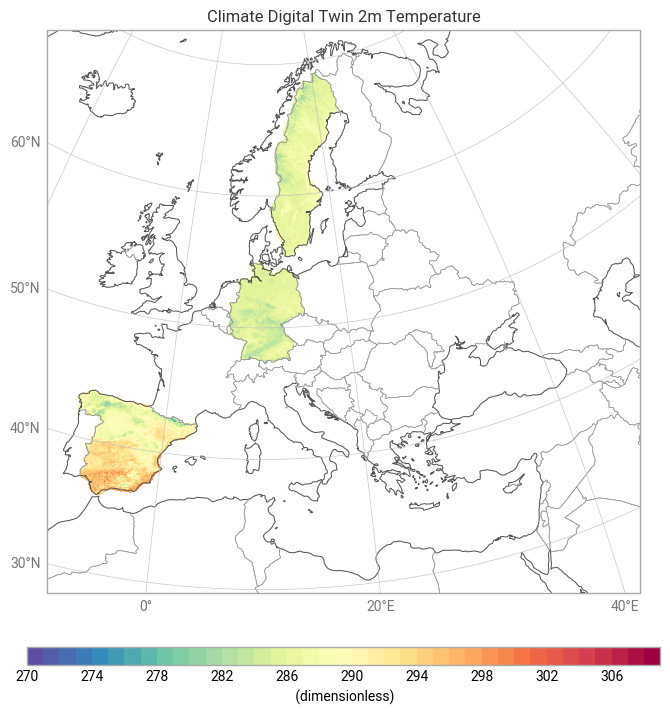

In [27]:
from cartopy import crs as ccrs 
import matplotlib.pyplot as plt

lats = ds.latitude.values
lons = ds.longitude.values
values = ds["2t"].values.squeeze()
lats, lons, values

import numpy as np
chart = earthkit.plots.Map(domain=["Europe"])
style = earthkit.plots.styles.Style(
    levels=np.arange(270, 310, 1),
    colors="Spectral_r",
)
chart.pcolormesh(
    x=lons, y=lats, z=values, style=style,
    interpolate={"distance_threshold": "auto"},
)

chart.coastlines()
chart.borders()
chart.gridlines()

chart.title("Climate Digital Twin 2m Temperature")

chart.legend()

chart.show()

/home/maaw/test_polytope/polytope_venv/lib/python3.11/site-packages/earthkit/plots/geo/grids.py:283: UserWarning: Interpolation produced NaN values in the global output grid, reinterpolating with `nearest`.
  warnings.warn(
/home/maaw/test_polytope/polytope_venv/lib/python3.11/site-packages/earthkit/plots/geo/grids.py:283: UserWarning: Interpolation produced NaN values in the global output grid, reinterpolating with `nearest`.
  warnings.warn(


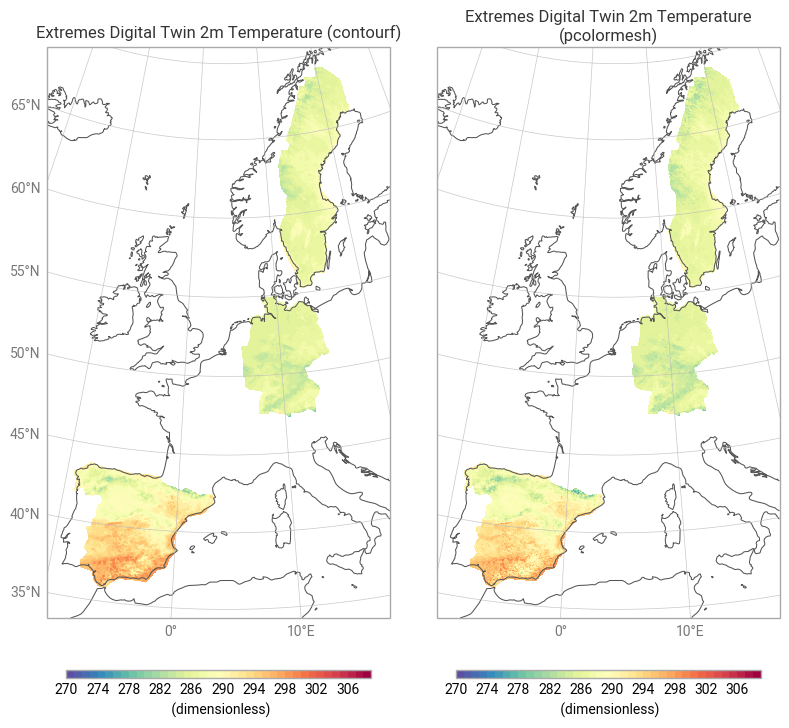

In [29]:
import numpy as np

figure = earthkit.plots.Figure(rows=1, columns=2, domain=["Spain", "Germany", "Sweden"])
style = earthkit.plots.styles.Style(
    levels=np.arange(270, 310, 1),
    colors="Spectral_r",
)

chart = figure.add_map()
chart.contourf(
    x=lons, y=lats, z=values, style=style,
    interpolate={"distance_threshold": "auto"},
)
chart.legend()
chart.title("Extremes Digital Twin 2m Temperature (contourf)")

chart = figure.add_map()
chart.pcolormesh(
    x=lons, y=lats, z=values, style=style,
    interpolate={"distance_threshold": "auto"},
)
chart.legend()
chart.title("Extremes Digital Twin 2m Temperature (pcolormesh)")

figure.coastlines()
figure.gridlines()